
### Training for 1-day ahead prediction ###


C:\Users\saqib\AppData\Local\Temp\ipykernel_13396\2599347572.py:111: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


Epoch 0, Loss: 0.226251
Epoch 10, Loss: 0.006161
Epoch 20, Loss: 0.005742
Epoch 30, Loss: 0.002461
Epoch 40, Loss: 0.003259
Epoch 50, Loss: 0.001812
Epoch 60, Loss: 0.001988
Epoch 70, Loss: 0.002287
Epoch 80, Loss: 0.001597
Epoch 90, Loss: 0.001321

1-Day Ahead Prediction
MSE: 6.139813, RMSE: 2.477865, MAE: 2.103385


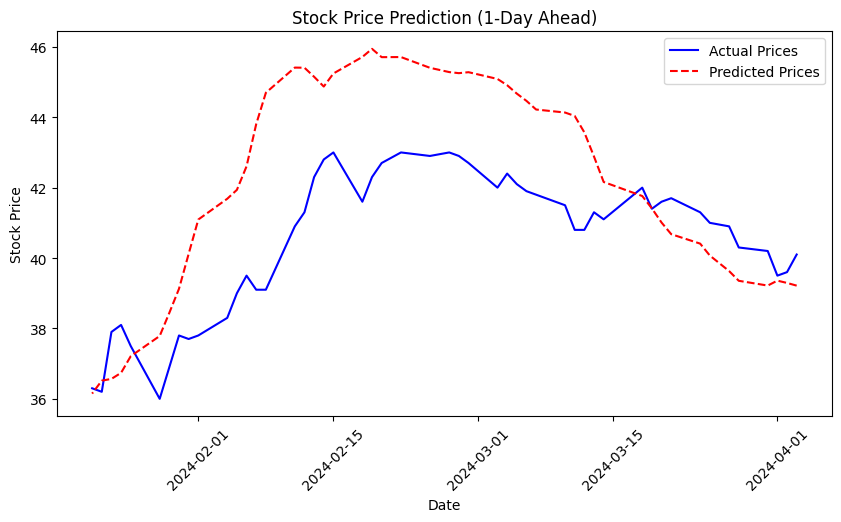


### Training for 3-day ahead prediction ###
Epoch 0, Loss: 0.086660
Epoch 10, Loss: 0.007887
Epoch 20, Loss: 0.004595
Epoch 30, Loss: 0.002926
Epoch 40, Loss: 0.001933
Epoch 50, Loss: 0.003415
Epoch 60, Loss: 0.003219
Epoch 70, Loss: 0.003076
Epoch 80, Loss: 0.001636
Epoch 90, Loss: 0.000899

3-Day Ahead Prediction
MSE: 1.913646, RMSE: 1.383346, MAE: 1.197375


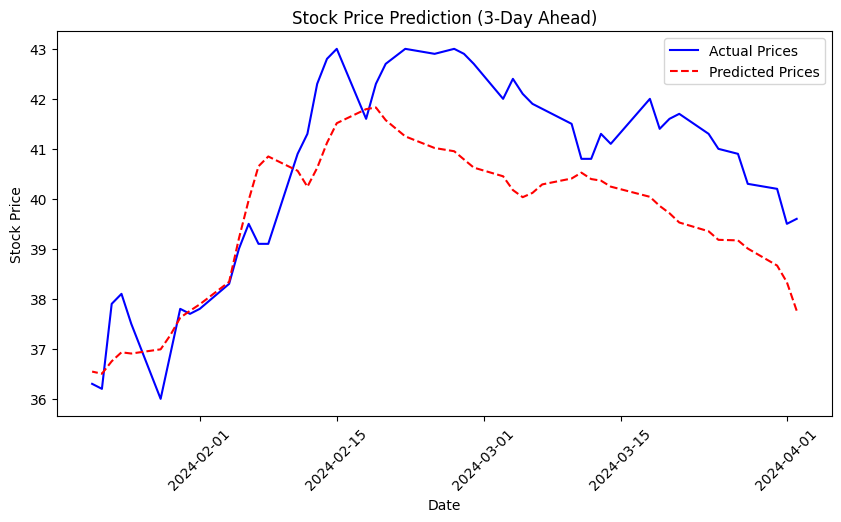


### Training for 5-day ahead prediction ###


C:\Users\saqib\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.172807
Epoch 10, Loss: 0.011062
Epoch 20, Loss: 0.007146
Epoch 30, Loss: 0.007782
Epoch 40, Loss: 0.006342
Epoch 50, Loss: 0.003247
Epoch 60, Loss: 0.004459
Epoch 70, Loss: 0.002942
Epoch 80, Loss: 0.002895
Epoch 90, Loss: 0.002544

5-Day Ahead Prediction
MSE: 3.184598, RMSE: 1.784544, MAE: 1.486869


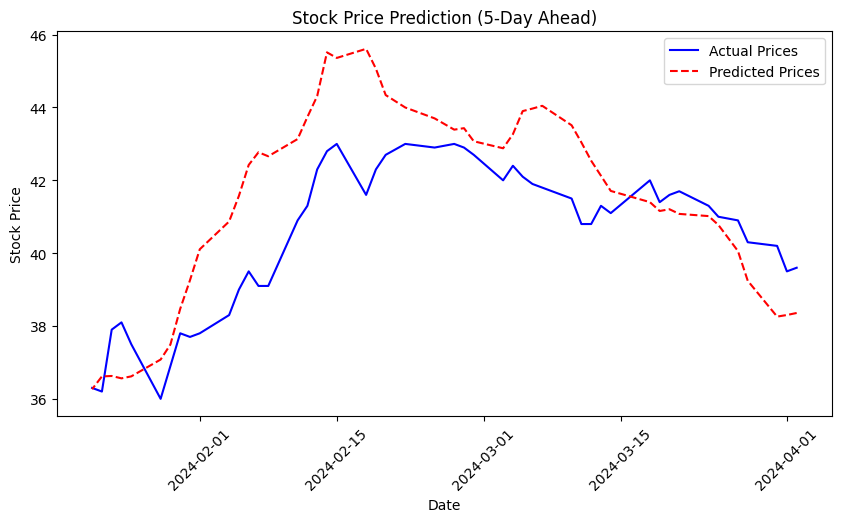


### Training for 10-day ahead prediction ###
Epoch 0, Loss: 0.084491
Epoch 10, Loss: 0.020056
Epoch 20, Loss: 0.012805
Epoch 30, Loss: 0.008479
Epoch 40, Loss: 0.004762
Epoch 50, Loss: 0.002531
Epoch 60, Loss: 0.001922
Epoch 70, Loss: 0.001379
Epoch 80, Loss: 0.001573
Epoch 90, Loss: 0.001651

10-Day Ahead Prediction
MSE: 27.210676, RMSE: 5.216385, MAE: 4.743900


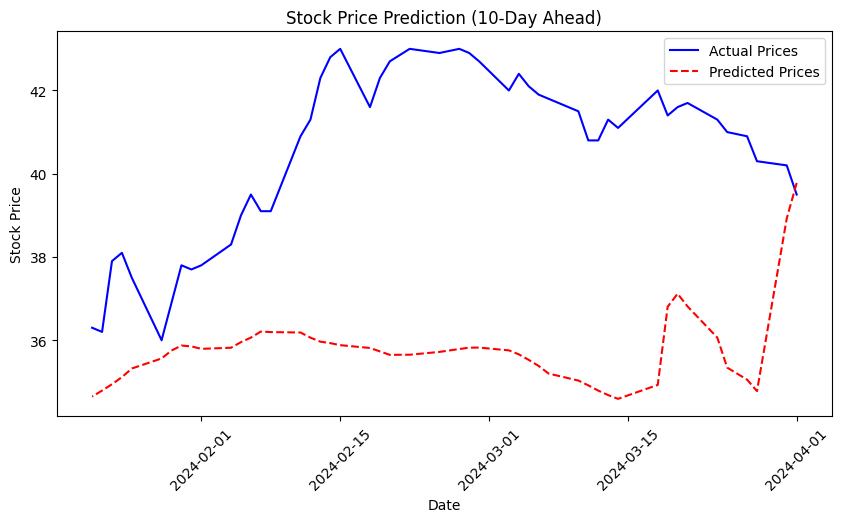


### Training for 15-day ahead prediction ###
Epoch 0, Loss: 0.189663
Epoch 10, Loss: 0.014296
Epoch 20, Loss: 0.008521
Epoch 30, Loss: 0.007522
Epoch 40, Loss: 0.003074
Epoch 50, Loss: 0.003401
Epoch 60, Loss: 0.001659
Epoch 70, Loss: 0.002108
Epoch 80, Loss: 0.001810
Epoch 90, Loss: 0.001893

15-Day Ahead Prediction
MSE: 128.591888, RMSE: 11.339836, MAE: 9.113914


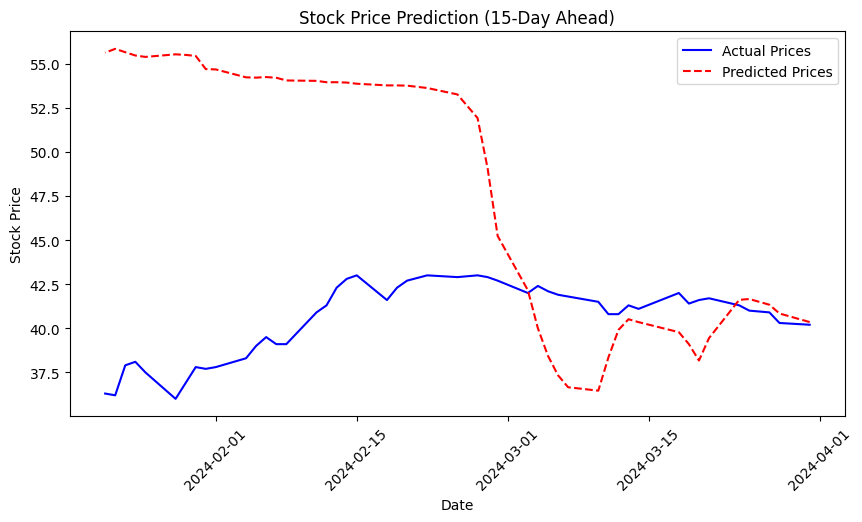


### Training for 20-day ahead prediction ###
Epoch 0, Loss: 0.094129
Epoch 10, Loss: 0.026425
Epoch 20, Loss: 0.019080
Epoch 30, Loss: 0.008572
Epoch 40, Loss: 0.006863
Epoch 50, Loss: 0.006668
Epoch 60, Loss: 0.003260
Epoch 70, Loss: 0.002023
Epoch 80, Loss: 0.007385
Epoch 90, Loss: 0.003261

20-Day Ahead Prediction
MSE: 11.019630, RMSE: 3.319583, MAE: 3.026196


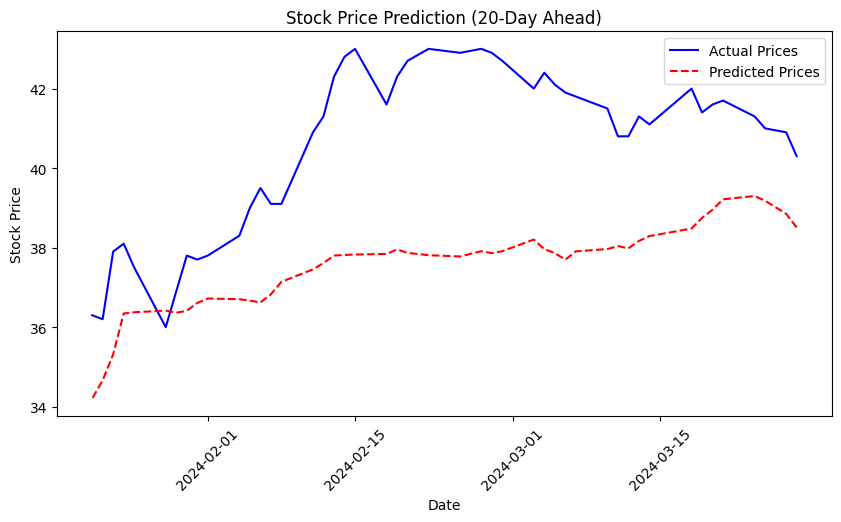


### Training for 30-day ahead prediction ###
Epoch 0, Loss: 0.196006
Epoch 10, Loss: 0.008856
Epoch 20, Loss: 0.006914
Epoch 30, Loss: 0.006779
Epoch 40, Loss: 0.007357
Epoch 50, Loss: 0.005967
Epoch 60, Loss: 0.004837
Epoch 70, Loss: 0.006359
Epoch 80, Loss: 0.003006
Epoch 90, Loss: 0.003430

30-Day Ahead Prediction
MSE: 20.304050, RMSE: 4.506002, MAE: 3.334396


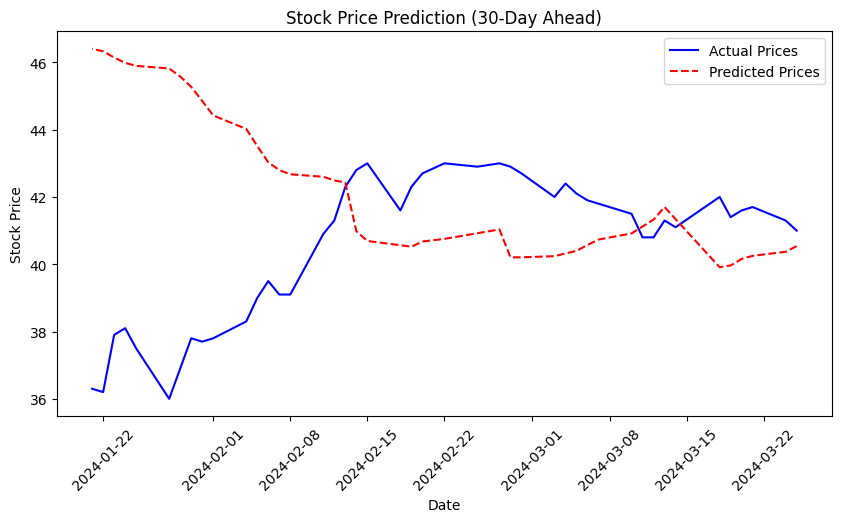

In [1]:

#bracbank
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# xLSTM Cell (No change)
class xLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, forget_bias=1.0, use_layer_norm=True):
        super(xLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.use_layer_norm = use_layer_norm
        
        self.W_xi = nn.Linear(input_size, hidden_size)
        self.W_hi = nn.Linear(hidden_size, hidden_size)
        self.W_xf = nn.Linear(input_size, hidden_size)
        self.W_hf = nn.Linear(hidden_size, hidden_size)
        self.W_xo = nn.Linear(input_size, hidden_size)
        self.W_ho = nn.Linear(hidden_size, hidden_size)
        self.W_xc = nn.Linear(input_size, hidden_size)
        self.W_hc = nn.Linear(hidden_size, hidden_size)
        self.W_ex = nn.Linear(input_size, hidden_size)
        self.W_eh = nn.Linear(hidden_size, hidden_size)
        
        if use_layer_norm:
            self.ln_i = nn.LayerNorm(hidden_size)
            self.ln_f = nn.LayerNorm(hidden_size)
            self.ln_o = nn.LayerNorm(hidden_size)
            self.ln_c = nn.LayerNorm(hidden_size)
            self.ln_x = nn.LayerNorm(hidden_size)
    
    def forward(self, x, states):
        h, c = states
        
        i = torch.sigmoid(self.ln_i(self.W_xi(x) + self.W_hi(h)))
        f = torch.sigmoid(self.ln_f(self.W_xf(x) + self.W_hf(h)))
        o = torch.sigmoid(self.ln_o(self.W_xo(x) + self.W_ho(h)))
        c_tilde = torch.tanh(self.ln_c(self.W_xc(x) + self.W_hc(h)))
        x_ext = torch.sigmoid(self.ln_x(self.W_ex(x) + self.W_eh(h)))
        
        c_next = f * c + i * c_tilde + x_ext * torch.tanh(self.W_ex(x) + self.W_eh(h))
        h_next = o * torch.tanh(c_next)
        
        return h_next, c_next

# xLSTM Layer
class xLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, dropout=0.1):
        super(xLSTM, self).__init__()
        self.layers = nn.ModuleList([xLSTMCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        h = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        c = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        
        outputs = []
        for t in range(seq_len):
            xt = x[:, t, :]
            for i, layer in enumerate(self.layers):
                h[i], c[i] = layer(xt, (h[i], c[i]))
                xt = h[i]
            outputs.append(h[-1])
        
        outputs = torch.stack(outputs, dim=1)
        return outputs, (h[-1], c[-1])

# Model
class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPredictor, self).__init__()
        self.xlstm = xLSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        xlstm_out, _ = self.xlstm(x)
        return self.fc(xlstm_out[:, -1, :])

# Data Preparation
def prepare_data(csv_file, feature_columns, target_column, seq_length, target_diff, train_split=0.8):
    data = pd.read_csv(csv_file).dropna()

    # Convert 'Date' to datetime format
    data['DATE'] = pd.to_datetime(data['DATE'])

    # Remove commas and convert to float
    for column in feature_columns + [target_column]:
        data[column] = data[column].replace({',': ''}, regex=True).astype(float)

    features = data[feature_columns].values
    target = data[target_column].values

    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
    target_scaler = MinMaxScaler()
    target = target_scaler.fit_transform(target.reshape(-1, 1)).flatten()

    X, y, dates = [], [], []
    for i in range(seq_length, len(features) - target_diff):
        X.append(features[i-seq_length:i])
        y.append(target[i + target_diff])  # Predicting 'target_diff' days ahead
        dates.append(data['DATE'].iloc[i + target_diff])  # Store corresponding date

    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    train_size = int(len(X) * train_split)

    return X[:train_size], y[:train_size], X[train_size:], y[train_size:], scaler, target_scaler, dates[train_size:]

# Training Function
def train_model(model, X_train, y_train, epochs, batch_size, lr):
    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
           
        if epoch % 10 == 0:
             print(f"Epoch {epoch}, Loss: {total_loss / len(dataloader):.6f}")

# Prediction & Evaluation
def evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, forecast_horizon):
    model.eval()
    predictions = model(X_test).detach().numpy()

    # Inverse transform predictions and actual values
    predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test = target_scaler.inverse_transform(y_test.numpy().reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    print(f"\n{forecast_horizon}-Day Ahead Prediction")
    print(f"MSE: {mse:.6f}, RMSE: {rmse:.6f}, MAE: {mae:.6f}")

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(dates, y_test, label="Actual Prices", color="blue")
    plt.plot(dates, predictions, label="Predicted Prices", color="red", linestyle="dashed")
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.title(f"Stock Price Prediction ({forecast_horizon}-Day Ahead)")
    plt.show()

# Main Execution
if __name__ == "__main__":
    csv_file = "D:/Research/Top10BDStocksData/BRACBANK.csv"
    feature_columns = ['OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']
    target_column = 'CLOSEP*'
    seq_length = 20
    forecast_horizons = [1, 3, 5, 10, 15,20,30]

    for horizon in forecast_horizons:
        print(f"\n### Training for {horizon}-day ahead prediction ###")
        X_train, y_train, X_test, y_test, scaler, target_scaler, dates = prepare_data(csv_file, feature_columns, target_column, seq_length, horizon)
        
        model = StockPredictor(input_size=len(feature_columns), hidden_size=64, num_layers=2, output_size=1)
        train_model(model, X_train, y_train, epochs=100, batch_size=32, lr=0.001)
        evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, horizon)



### Training for 1-day ahead prediction ###
Epoch 0, Loss: 0.040151
Epoch 10, Loss: 0.002929
Epoch 20, Loss: 0.002587
Epoch 30, Loss: 0.001628
Epoch 40, Loss: 0.001384
Epoch 50, Loss: 0.001363
Epoch 60, Loss: 0.001125
Epoch 70, Loss: 0.001177
Epoch 80, Loss: 0.000876
Epoch 90, Loss: 0.000998

1-Day Ahead Prediction
MSE: 565.244324, RMSE: 23.774867, MAE: 18.011913


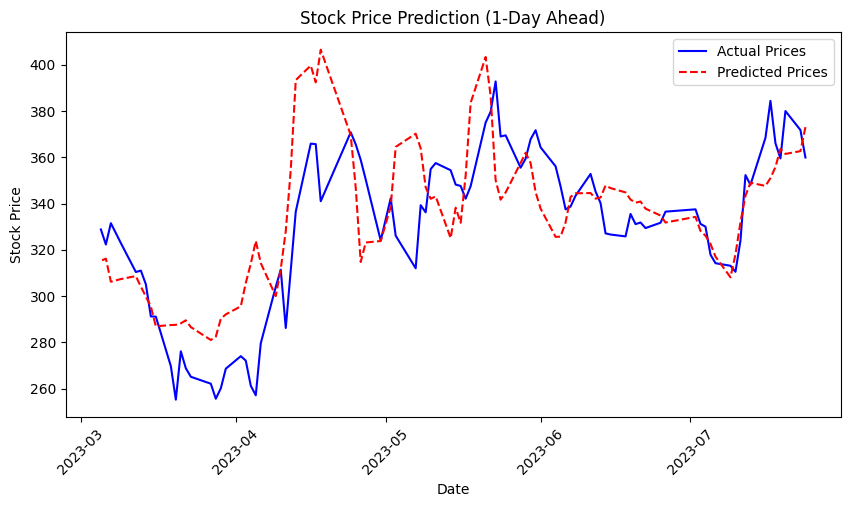


### Training for 3-day ahead prediction ###
Epoch 0, Loss: 0.042595
Epoch 10, Loss: 0.003758
Epoch 20, Loss: 0.003549
Epoch 30, Loss: 0.002765
Epoch 40, Loss: 0.002553
Epoch 50, Loss: 0.002312
Epoch 60, Loss: 0.003934
Epoch 70, Loss: 0.002137
Epoch 80, Loss: 0.001562
Epoch 90, Loss: 0.001375

3-Day Ahead Prediction
MSE: 839.443176, RMSE: 28.973146, MAE: 22.520439


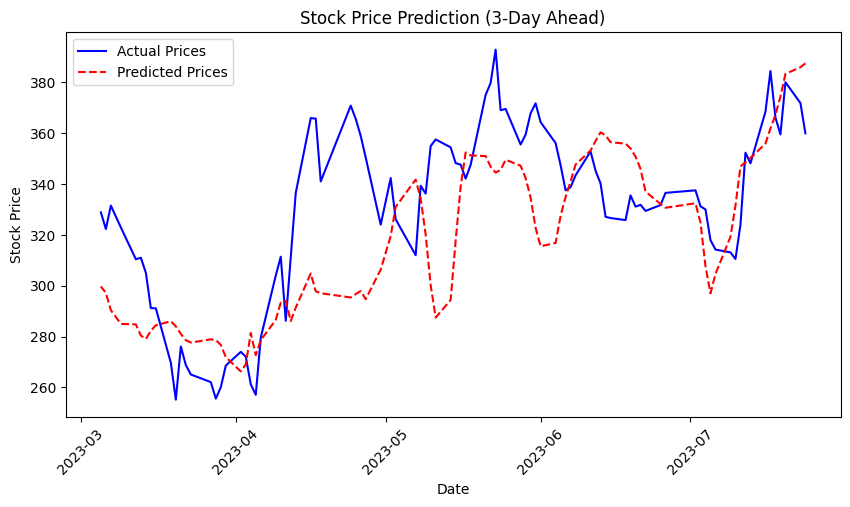


### Training for 5-day ahead prediction ###
Epoch 0, Loss: 0.053029
Epoch 10, Loss: 0.004170
Epoch 20, Loss: 0.005144
Epoch 30, Loss: 0.004391
Epoch 40, Loss: 0.003267
Epoch 50, Loss: 0.003235
Epoch 60, Loss: 0.002339
Epoch 70, Loss: 0.001867
Epoch 80, Loss: 0.001737
Epoch 90, Loss: 0.001978

5-Day Ahead Prediction
MSE: 1054.301880, RMSE: 32.470015, MAE: 27.867361


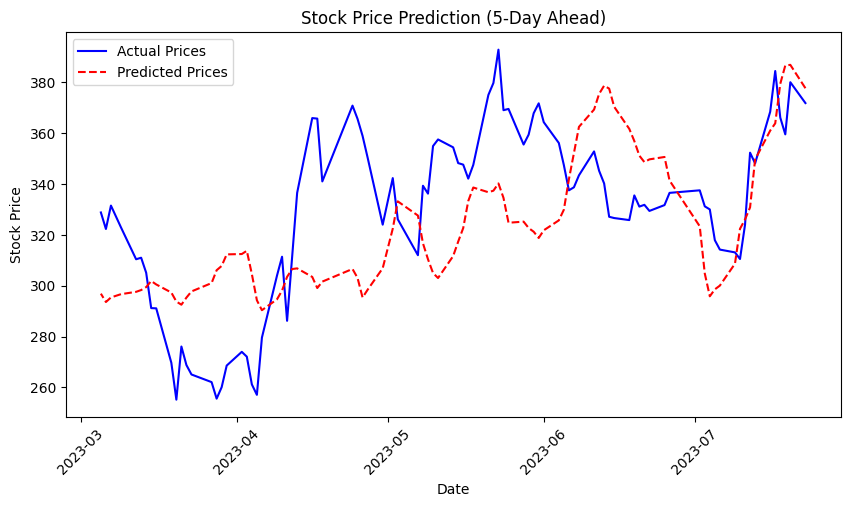


### Training for 10-day ahead prediction ###
Epoch 0, Loss: 0.047438
Epoch 10, Loss: 0.007073
Epoch 20, Loss: 0.005206
Epoch 30, Loss: 0.006302
Epoch 40, Loss: 0.004322
Epoch 50, Loss: 0.002316
Epoch 60, Loss: 0.001993
Epoch 70, Loss: 0.001226
Epoch 80, Loss: 0.001908
Epoch 90, Loss: 0.000873

10-Day Ahead Prediction
MSE: 2260.335938, RMSE: 47.542990, MAE: 36.075909


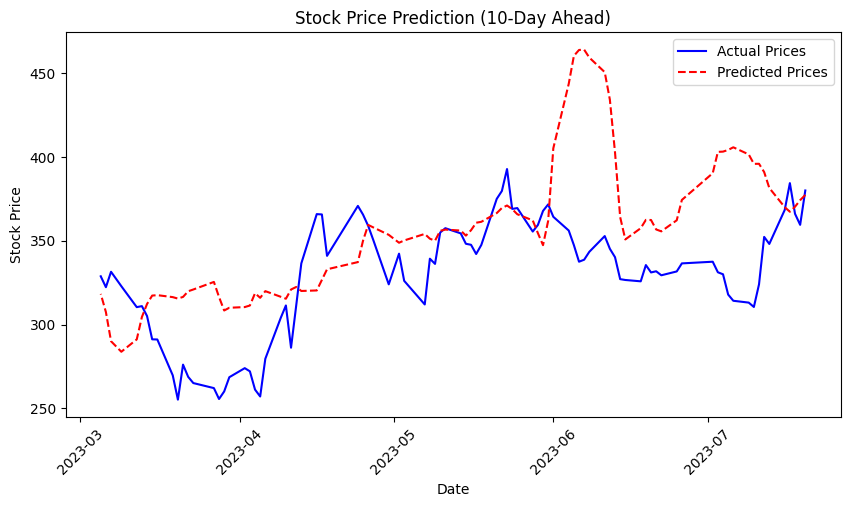


### Training for 15-day ahead prediction ###
Epoch 0, Loss: 0.070192
Epoch 10, Loss: 0.011833
Epoch 20, Loss: 0.009274
Epoch 30, Loss: 0.007770
Epoch 40, Loss: 0.005961
Epoch 50, Loss: 0.006972
Epoch 60, Loss: 0.005528
Epoch 70, Loss: 0.005006
Epoch 80, Loss: 0.002352
Epoch 90, Loss: 0.002208

15-Day Ahead Prediction
MSE: 3279.151367, RMSE: 57.263875, MAE: 45.310688


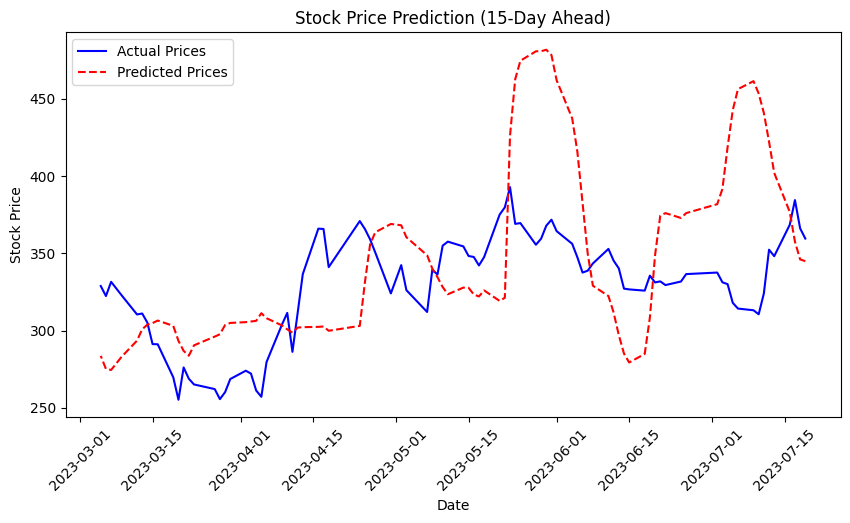


### Training for 20-day ahead prediction ###
Epoch 0, Loss: 0.035259
Epoch 10, Loss: 0.009987
Epoch 20, Loss: 0.004842
Epoch 30, Loss: 0.004630
Epoch 40, Loss: 0.001675
Epoch 50, Loss: 0.001197
Epoch 60, Loss: 0.001105
Epoch 70, Loss: 0.001190
Epoch 80, Loss: 0.000679
Epoch 90, Loss: 0.000710

20-Day Ahead Prediction
MSE: 4691.323730, RMSE: 68.493239, MAE: 55.861740


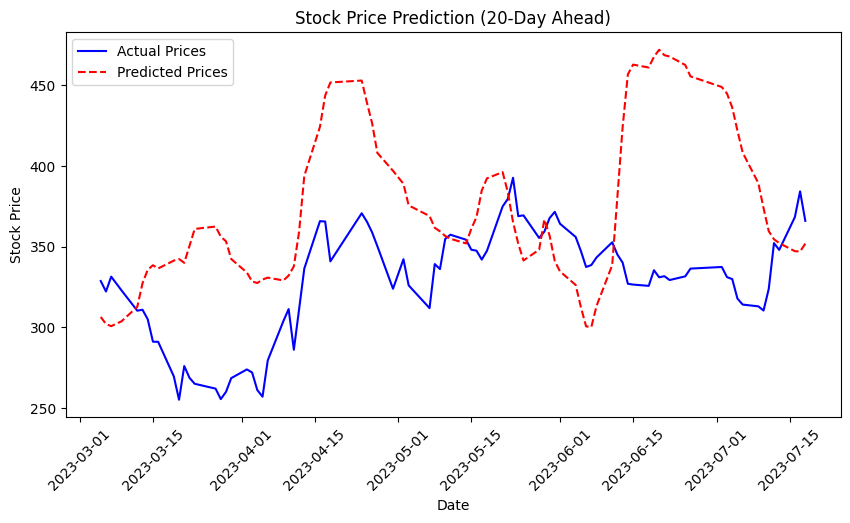


### Training for 30-day ahead prediction ###
Epoch 0, Loss: 0.055334
Epoch 10, Loss: 0.015758
Epoch 20, Loss: 0.010738
Epoch 30, Loss: 0.004301
Epoch 40, Loss: 0.009109
Epoch 50, Loss: 0.014127
Epoch 60, Loss: 0.008094
Epoch 70, Loss: 0.003753
Epoch 80, Loss: 0.002042
Epoch 90, Loss: 0.001313

30-Day Ahead Prediction
MSE: 7900.703613, RMSE: 88.885902, MAE: 62.196522


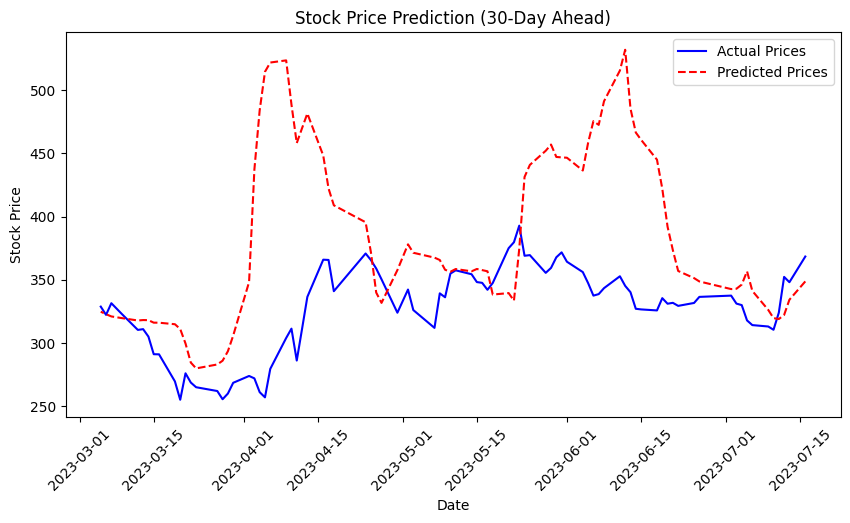

In [3]:

#ORION
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# xLSTM Cell (No change)
class xLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, forget_bias=1.0, use_layer_norm=True):
        super(xLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.use_layer_norm = use_layer_norm
        
        self.W_xi = nn.Linear(input_size, hidden_size)
        self.W_hi = nn.Linear(hidden_size, hidden_size)
        self.W_xf = nn.Linear(input_size, hidden_size)
        self.W_hf = nn.Linear(hidden_size, hidden_size)
        self.W_xo = nn.Linear(input_size, hidden_size)
        self.W_ho = nn.Linear(hidden_size, hidden_size)
        self.W_xc = nn.Linear(input_size, hidden_size)
        self.W_hc = nn.Linear(hidden_size, hidden_size)
        self.W_ex = nn.Linear(input_size, hidden_size)
        self.W_eh = nn.Linear(hidden_size, hidden_size)
        
        if use_layer_norm:
            self.ln_i = nn.LayerNorm(hidden_size)
            self.ln_f = nn.LayerNorm(hidden_size)
            self.ln_o = nn.LayerNorm(hidden_size)
            self.ln_c = nn.LayerNorm(hidden_size)
            self.ln_x = nn.LayerNorm(hidden_size)
    
    def forward(self, x, states):
        h, c = states
        
        i = torch.sigmoid(self.ln_i(self.W_xi(x) + self.W_hi(h)))
        f = torch.sigmoid(self.ln_f(self.W_xf(x) + self.W_hf(h)))
        o = torch.sigmoid(self.ln_o(self.W_xo(x) + self.W_ho(h)))
        c_tilde = torch.tanh(self.ln_c(self.W_xc(x) + self.W_hc(h)))
        x_ext = torch.sigmoid(self.ln_x(self.W_ex(x) + self.W_eh(h)))
        
        c_next = f * c + i * c_tilde + x_ext * torch.tanh(self.W_ex(x) + self.W_eh(h))
        h_next = o * torch.tanh(c_next)
        
        return h_next, c_next

# xLSTM Layer
class xLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, dropout=0.1):
        super(xLSTM, self).__init__()
        self.layers = nn.ModuleList([xLSTMCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        h = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        c = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        
        outputs = []
        for t in range(seq_len):
            xt = x[:, t, :]
            for i, layer in enumerate(self.layers):
                h[i], c[i] = layer(xt, (h[i], c[i]))
                xt = h[i]
            outputs.append(h[-1])
        
        outputs = torch.stack(outputs, dim=1)
        return outputs, (h[-1], c[-1])

# Model
class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPredictor, self).__init__()
        self.xlstm = xLSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        xlstm_out, _ = self.xlstm(x)
        return self.fc(xlstm_out[:, -1, :])

# Data Preparation
def prepare_data(csv_file, feature_columns, target_column, seq_length, target_diff, train_split=0.8):
    data = pd.read_csv(csv_file).dropna()

    # Convert 'Date' to datetime format
    data['DATE'] = pd.to_datetime(data['DATE'])

    # Remove commas and convert to float
    for column in feature_columns + [target_column]:
        data[column] = data[column].replace({',': ''}, regex=True).astype(float)

    features = data[feature_columns].values
    target = data[target_column].values

    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
    target_scaler = MinMaxScaler()
    target = target_scaler.fit_transform(target.reshape(-1, 1)).flatten()

    X, y, dates = [], [], []
    for i in range(seq_length, len(features) - target_diff):
        X.append(features[i-seq_length:i])
        y.append(target[i + target_diff])  # Predicting 'target_diff' days ahead
        dates.append(data['DATE'].iloc[i + target_diff])  # Store corresponding date

    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    train_size = int(len(X) * train_split)

    return X[:train_size], y[:train_size], X[train_size:], y[train_size:], scaler, target_scaler, dates[train_size:]

# Training Function
def train_model(model, X_train, y_train, epochs, batch_size, lr):
    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
           
        if epoch % 10 == 0:
             print(f"Epoch {epoch}, Loss: {total_loss / len(dataloader):.6f}")

# Prediction & Evaluation
def evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, forecast_horizon):
    model.eval()
    predictions = model(X_test).detach().numpy()

    # Inverse transform predictions and actual values
    predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test = target_scaler.inverse_transform(y_test.numpy().reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    print(f"\n{forecast_horizon}-Day Ahead Prediction")
    print(f"MSE: {mse:.6f}, RMSE: {rmse:.6f}, MAE: {mae:.6f}")

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(dates, y_test, label="Actual Prices", color="blue")
    plt.plot(dates, predictions, label="Predicted Prices", color="red", linestyle="dashed")
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.title(f"Stock Price Prediction ({forecast_horizon}-Day Ahead)")
    plt.show()

# Main Execution
if __name__ == "__main__":
    csv_file = "D:/Research/Top10BDStocksData/ORIONINFU.csv"
    feature_columns = ['OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']
    target_column = 'CLOSEP*'
    seq_length = 20
    forecast_horizons = [1, 3, 5, 10, 15,20,30]

    for horizon in forecast_horizons:
        print(f"\n### Training for {horizon}-day ahead prediction ###")
        X_train, y_train, X_test, y_test, scaler, target_scaler, dates = prepare_data(csv_file, feature_columns, target_column, seq_length, horizon)
        
        model = StockPredictor(input_size=len(feature_columns), hidden_size=64, num_layers=2, output_size=1)
        train_model(model, X_train, y_train, epochs=100, batch_size=32, lr=0.001)
        evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, horizon)



### Training for 1-day ahead prediction ###
Epoch 0, Loss: 0.129632
Epoch 10, Loss: 0.003186
Epoch 20, Loss: 0.001410
Epoch 30, Loss: 0.002664
Epoch 40, Loss: 0.001218
Epoch 50, Loss: 0.001118
Epoch 60, Loss: 0.001703
Epoch 70, Loss: 0.001006
Epoch 80, Loss: 0.000958
Epoch 90, Loss: 0.001511

1-Day Ahead Prediction
MSE: 9.277666, RMSE: 3.045926, MAE: 2.177574


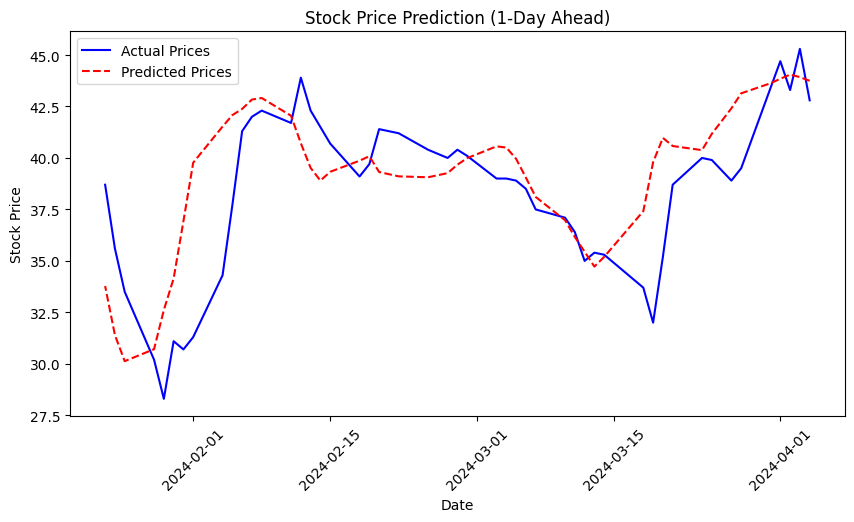


### Training for 3-day ahead prediction ###


C:\Users\saqib\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.080552
Epoch 10, Loss: 0.003117
Epoch 20, Loss: 0.002515
Epoch 30, Loss: 0.001682
Epoch 40, Loss: 0.003660
Epoch 50, Loss: 0.002394
Epoch 60, Loss: 0.001966
Epoch 70, Loss: 0.002536
Epoch 80, Loss: 0.001695
Epoch 90, Loss: 0.003177

3-Day Ahead Prediction
MSE: 20.022039, RMSE: 4.474599, MAE: 3.410958


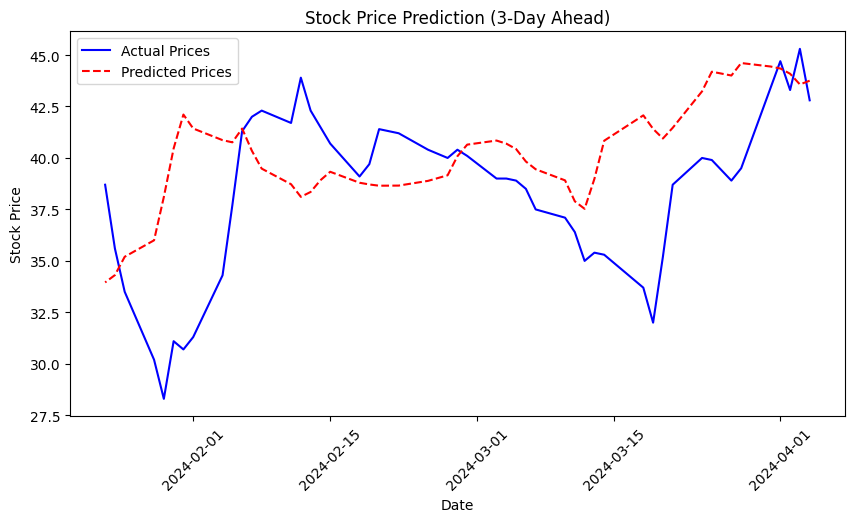


### Training for 5-day ahead prediction ###
Epoch 0, Loss: 0.222984
Epoch 10, Loss: 0.002580
Epoch 20, Loss: 0.002341
Epoch 30, Loss: 0.002368
Epoch 40, Loss: 0.001954
Epoch 50, Loss: 0.001945
Epoch 60, Loss: 0.002052
Epoch 70, Loss: 0.001920
Epoch 80, Loss: 0.001890
Epoch 90, Loss: 0.001624

5-Day Ahead Prediction
MSE: 27.431885, RMSE: 5.237546, MAE: 4.295328


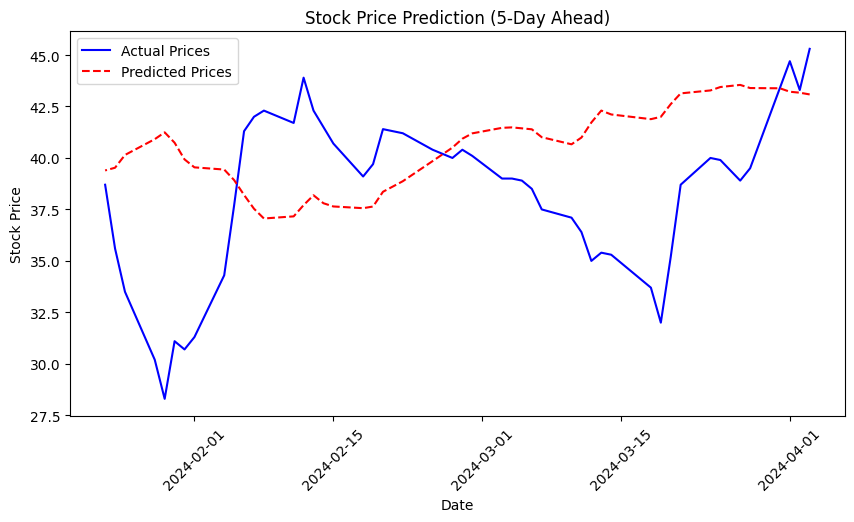


### Training for 10-day ahead prediction ###
Epoch 0, Loss: 0.060294
Epoch 10, Loss: 0.004530
Epoch 20, Loss: 0.004196
Epoch 30, Loss: 0.003650
Epoch 40, Loss: 0.003370
Epoch 50, Loss: 0.004733
Epoch 60, Loss: 0.003086
Epoch 70, Loss: 0.003595
Epoch 80, Loss: 0.002675
Epoch 90, Loss: 0.002511

10-Day Ahead Prediction
MSE: 47.053520, RMSE: 6.859557, MAE: 5.724624


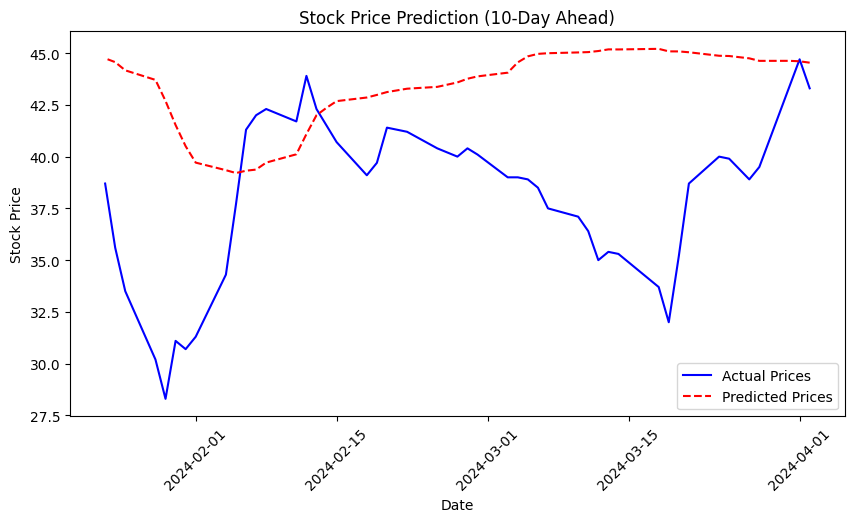


### Training for 15-day ahead prediction ###
Epoch 0, Loss: 0.113979
Epoch 10, Loss: 0.005177
Epoch 20, Loss: 0.004133
Epoch 30, Loss: 0.004041
Epoch 40, Loss: 0.003425
Epoch 50, Loss: 0.002764
Epoch 60, Loss: 0.003307
Epoch 70, Loss: 0.002068
Epoch 80, Loss: 0.003461
Epoch 90, Loss: 0.002207

15-Day Ahead Prediction
MSE: 37.847301, RMSE: 6.152016, MAE: 4.947846


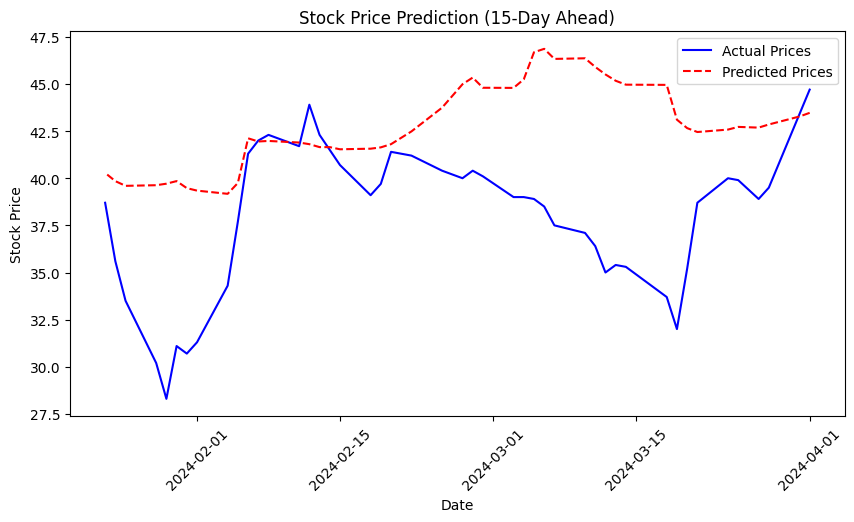


### Training for 20-day ahead prediction ###
Epoch 0, Loss: 0.062383
Epoch 10, Loss: 0.006550
Epoch 20, Loss: 0.004646
Epoch 30, Loss: 0.003132
Epoch 40, Loss: 0.004411
Epoch 50, Loss: 0.001858
Epoch 60, Loss: 0.003520
Epoch 70, Loss: 0.001296
Epoch 80, Loss: 0.000654
Epoch 90, Loss: 0.000691

20-Day Ahead Prediction
MSE: 42.809517, RMSE: 6.542898, MAE: 4.806952


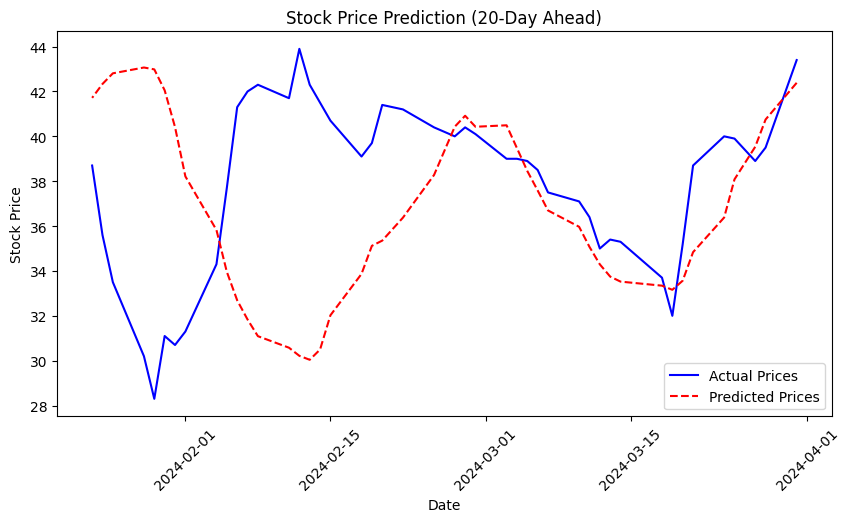


### Training for 30-day ahead prediction ###
Epoch 0, Loss: 0.109482
Epoch 10, Loss: 0.014590
Epoch 20, Loss: 0.012899
Epoch 30, Loss: 0.007270
Epoch 40, Loss: 0.004208
Epoch 50, Loss: 0.005445
Epoch 60, Loss: 0.002073
Epoch 70, Loss: 0.001039
Epoch 80, Loss: 0.001277
Epoch 90, Loss: 0.010414

30-Day Ahead Prediction
MSE: 29.811287, RMSE: 5.459971, MAE: 4.099538


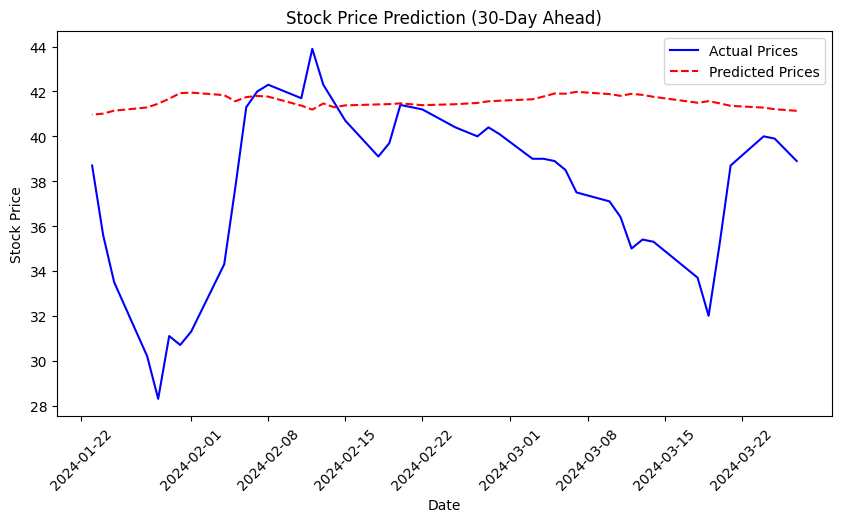

In [4]:

#SPCERAMICS
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# xLSTM Cell (No change)
class xLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, forget_bias=1.0, use_layer_norm=True):
        super(xLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.use_layer_norm = use_layer_norm
        
        self.W_xi = nn.Linear(input_size, hidden_size)
        self.W_hi = nn.Linear(hidden_size, hidden_size)
        self.W_xf = nn.Linear(input_size, hidden_size)
        self.W_hf = nn.Linear(hidden_size, hidden_size)
        self.W_xo = nn.Linear(input_size, hidden_size)
        self.W_ho = nn.Linear(hidden_size, hidden_size)
        self.W_xc = nn.Linear(input_size, hidden_size)
        self.W_hc = nn.Linear(hidden_size, hidden_size)
        self.W_ex = nn.Linear(input_size, hidden_size)
        self.W_eh = nn.Linear(hidden_size, hidden_size)
        
        if use_layer_norm:
            self.ln_i = nn.LayerNorm(hidden_size)
            self.ln_f = nn.LayerNorm(hidden_size)
            self.ln_o = nn.LayerNorm(hidden_size)
            self.ln_c = nn.LayerNorm(hidden_size)
            self.ln_x = nn.LayerNorm(hidden_size)
    
    def forward(self, x, states):
        h, c = states
        
        i = torch.sigmoid(self.ln_i(self.W_xi(x) + self.W_hi(h)))
        f = torch.sigmoid(self.ln_f(self.W_xf(x) + self.W_hf(h)))
        o = torch.sigmoid(self.ln_o(self.W_xo(x) + self.W_ho(h)))
        c_tilde = torch.tanh(self.ln_c(self.W_xc(x) + self.W_hc(h)))
        x_ext = torch.sigmoid(self.ln_x(self.W_ex(x) + self.W_eh(h)))
        
        c_next = f * c + i * c_tilde + x_ext * torch.tanh(self.W_ex(x) + self.W_eh(h))
        h_next = o * torch.tanh(c_next)
        
        return h_next, c_next

# xLSTM Layer
class xLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, dropout=0.1):
        super(xLSTM, self).__init__()
        self.layers = nn.ModuleList([xLSTMCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        h = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        c = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        
        outputs = []
        for t in range(seq_len):
            xt = x[:, t, :]
            for i, layer in enumerate(self.layers):
                h[i], c[i] = layer(xt, (h[i], c[i]))
                xt = h[i]
            outputs.append(h[-1])
        
        outputs = torch.stack(outputs, dim=1)
        return outputs, (h[-1], c[-1])

# Model
class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPredictor, self).__init__()
        self.xlstm = xLSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        xlstm_out, _ = self.xlstm(x)
        return self.fc(xlstm_out[:, -1, :])

# Data Preparation
def prepare_data(csv_file, feature_columns, target_column, seq_length, target_diff, train_split=0.8):
    data = pd.read_csv(csv_file).dropna()

    # Convert 'Date' to datetime format
    data['DATE'] = pd.to_datetime(data['DATE'])

    # Remove commas and convert to float
    for column in feature_columns + [target_column]:
        data[column] = data[column].replace({',': ''}, regex=True).astype(float)

    features = data[feature_columns].values
    target = data[target_column].values

    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
    target_scaler = MinMaxScaler()
    target = target_scaler.fit_transform(target.reshape(-1, 1)).flatten()

    X, y, dates = [], [], []
    for i in range(seq_length, len(features) - target_diff):
        X.append(features[i-seq_length:i])
        y.append(target[i + target_diff])  # Predicting 'target_diff' days ahead
        dates.append(data['DATE'].iloc[i + target_diff])  # Store corresponding date

    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    train_size = int(len(X) * train_split)

    return X[:train_size], y[:train_size], X[train_size:], y[train_size:], scaler, target_scaler, dates[train_size:]

# Training Function
def train_model(model, X_train, y_train, epochs, batch_size, lr):
    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
           
        if epoch % 10 == 0:
             print(f"Epoch {epoch}, Loss: {total_loss / len(dataloader):.6f}")

# Prediction & Evaluation
def evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, forecast_horizon):
    model.eval()
    predictions = model(X_test).detach().numpy()

    # Inverse transform predictions and actual values
    predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test = target_scaler.inverse_transform(y_test.numpy().reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    print(f"\n{forecast_horizon}-Day Ahead Prediction")
    print(f"MSE: {mse:.6f}, RMSE: {rmse:.6f}, MAE: {mae:.6f}")

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(dates, y_test, label="Actual Prices", color="blue")
    plt.plot(dates, predictions, label="Predicted Prices", color="red", linestyle="dashed")
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.title(f"Stock Price Prediction ({forecast_horizon}-Day Ahead)")
    plt.show()

# Main Execution
if __name__ == "__main__":
    csv_file = "D:/Research/Top10BDStocksData/SPCERAMICS.csv"
    feature_columns = ['OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']
    target_column = 'CLOSEP*'
    seq_length = 20
    forecast_horizons = [1, 3, 5, 10, 15,20,30]

    for horizon in forecast_horizons:
        print(f"\n### Training for {horizon}-day ahead prediction ###")
        X_train, y_train, X_test, y_test, scaler, target_scaler, dates = prepare_data(csv_file, feature_columns, target_column, seq_length, horizon)
        
        model = StockPredictor(input_size=len(feature_columns), hidden_size=64, num_layers=2, output_size=1)
        train_model(model, X_train, y_train, epochs=100, batch_size=32, lr=0.001)
        evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, horizon)



### Training for 1-day ahead prediction ###
Epoch 0, Loss: 0.033669
Epoch 10, Loss: 0.002158
Epoch 20, Loss: 0.001503
Epoch 30, Loss: 0.001471
Epoch 40, Loss: 0.001172
Epoch 50, Loss: 0.001848
Epoch 60, Loss: 0.000925
Epoch 70, Loss: 0.000938
Epoch 80, Loss: 0.000693
Epoch 90, Loss: 0.000844

1-Day Ahead Prediction
MSE: 1.373974, RMSE: 1.172166, MAE: 0.895201


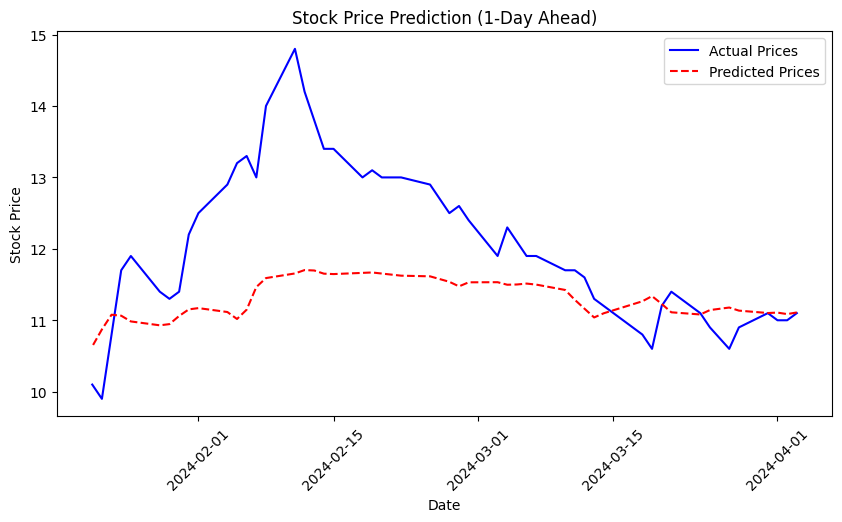


### Training for 3-day ahead prediction ###
Epoch 0, Loss: 0.019375
Epoch 10, Loss: 0.003259
Epoch 20, Loss: 0.002584
Epoch 30, Loss: 0.001845
Epoch 40, Loss: 0.001641
Epoch 50, Loss: 0.003164
Epoch 60, Loss: 0.002285
Epoch 70, Loss: 0.002257
Epoch 80, Loss: 0.002292
Epoch 90, Loss: 0.001942

3-Day Ahead Prediction
MSE: 1.943928, RMSE: 1.394248, MAE: 1.063354


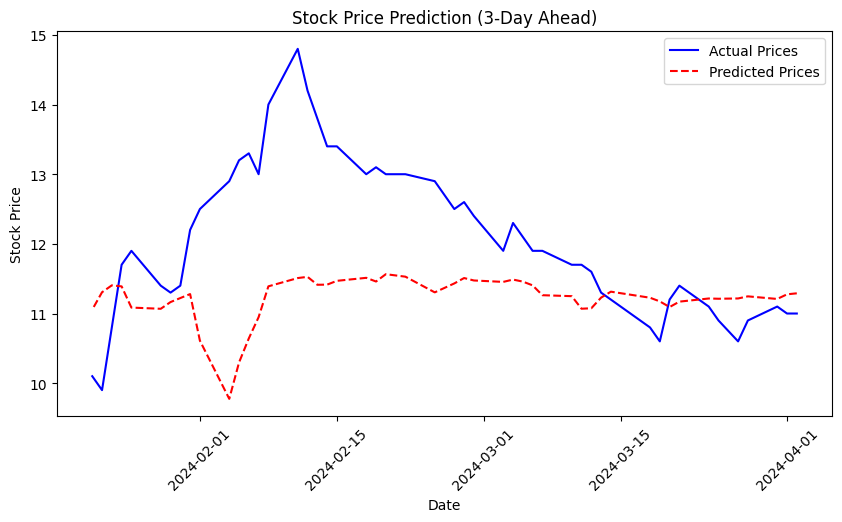


### Training for 5-day ahead prediction ###


C:\Users\saqib\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 0.061113
Epoch 10, Loss: 0.006379
Epoch 20, Loss: 0.003524
Epoch 30, Loss: 0.010319
Epoch 40, Loss: 0.004565
Epoch 50, Loss: 0.005251
Epoch 60, Loss: 0.003281
Epoch 70, Loss: 0.002718
Epoch 80, Loss: 0.003514
Epoch 90, Loss: 0.003024

5-Day Ahead Prediction
MSE: 2.038754, RMSE: 1.427850, MAE: 1.171642


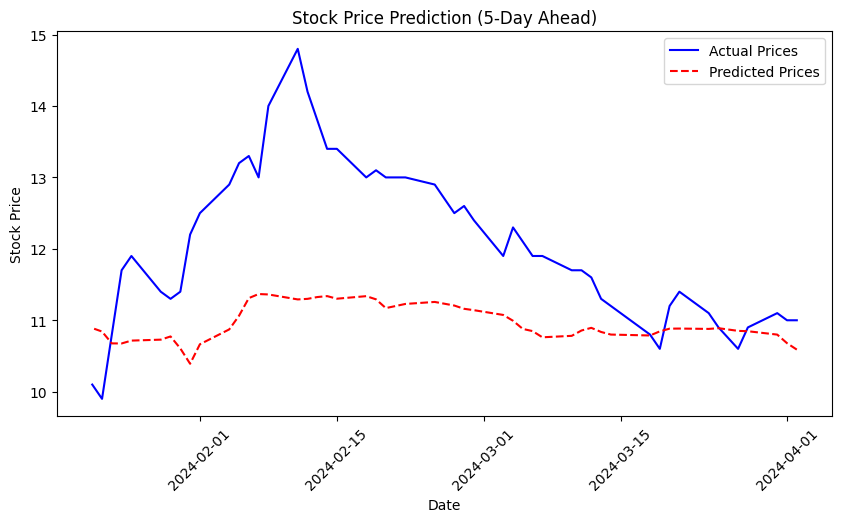


### Training for 10-day ahead prediction ###
Epoch 0, Loss: 0.037109
Epoch 10, Loss: 0.005323
Epoch 20, Loss: 0.004365
Epoch 30, Loss: 0.004196
Epoch 40, Loss: 0.003390
Epoch 50, Loss: 0.004124
Epoch 60, Loss: 0.002597
Epoch 70, Loss: 0.003621
Epoch 80, Loss: 0.002668
Epoch 90, Loss: 0.001093

10-Day Ahead Prediction
MSE: 0.618767, RMSE: 0.786618, MAE: 0.626991


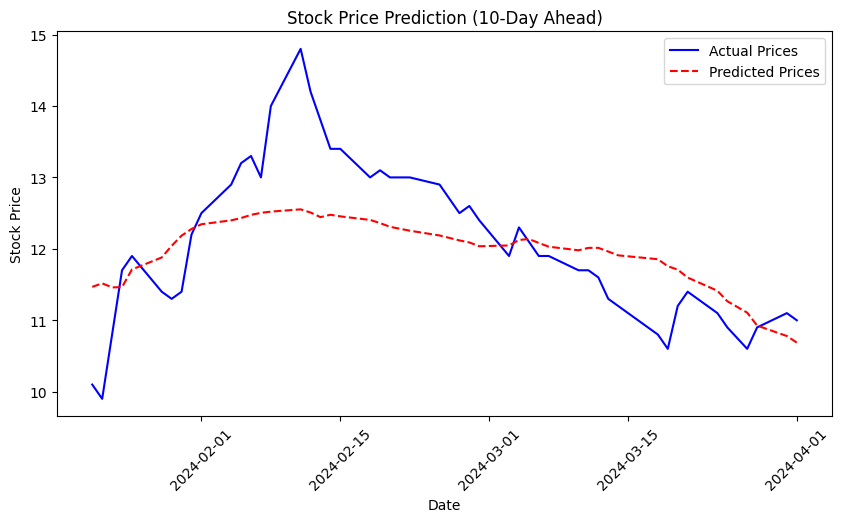


### Training for 15-day ahead prediction ###
Epoch 0, Loss: 0.026761
Epoch 10, Loss: 0.005324
Epoch 20, Loss: 0.004586
Epoch 30, Loss: 0.003202
Epoch 40, Loss: 0.003609
Epoch 50, Loss: 0.002704
Epoch 60, Loss: 0.001826
Epoch 70, Loss: 0.001948
Epoch 80, Loss: 0.001241
Epoch 90, Loss: 0.001380

15-Day Ahead Prediction
MSE: 5.170921, RMSE: 2.273966, MAE: 1.916808


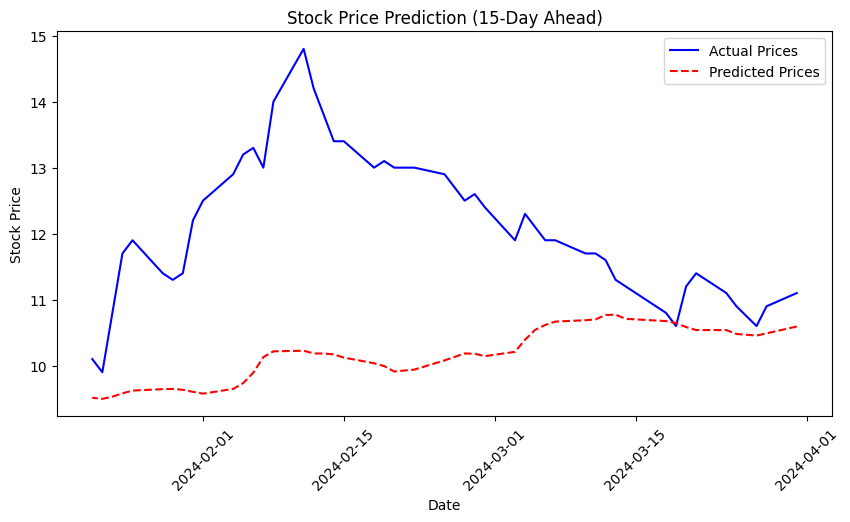


### Training for 20-day ahead prediction ###
Epoch 0, Loss: 0.029500
Epoch 10, Loss: 0.005040
Epoch 20, Loss: 0.003182
Epoch 30, Loss: 0.002379
Epoch 40, Loss: 0.002055
Epoch 50, Loss: 0.002601
Epoch 60, Loss: 0.002440
Epoch 70, Loss: 0.001233
Epoch 80, Loss: 0.001258
Epoch 90, Loss: 0.001370

20-Day Ahead Prediction
MSE: 5.819338, RMSE: 2.412330, MAE: 2.070950


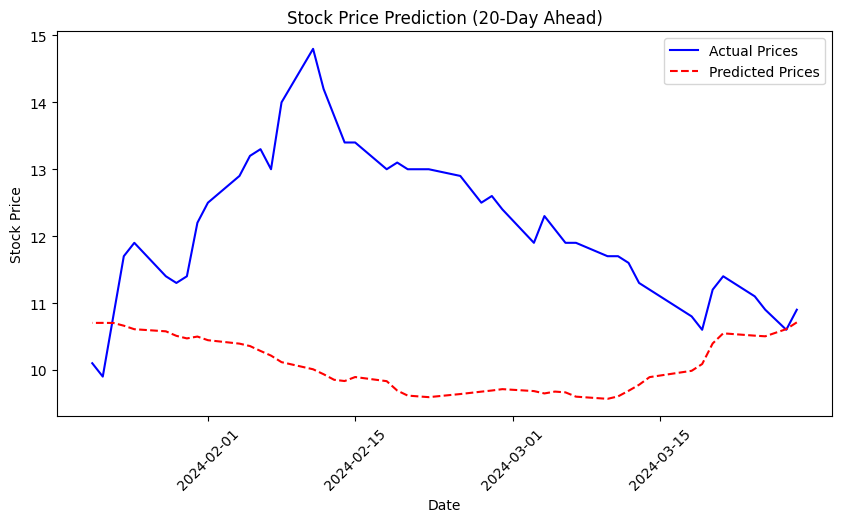


### Training for 30-day ahead prediction ###
Epoch 0, Loss: 0.038030
Epoch 10, Loss: 0.009761
Epoch 20, Loss: 0.003286
Epoch 30, Loss: 0.002775
Epoch 40, Loss: 0.002388
Epoch 50, Loss: 0.002001
Epoch 60, Loss: 0.003800
Epoch 70, Loss: 0.001850
Epoch 80, Loss: 0.001009
Epoch 90, Loss: 0.001654

30-Day Ahead Prediction
MSE: 9.737637, RMSE: 3.120519, MAE: 2.918181


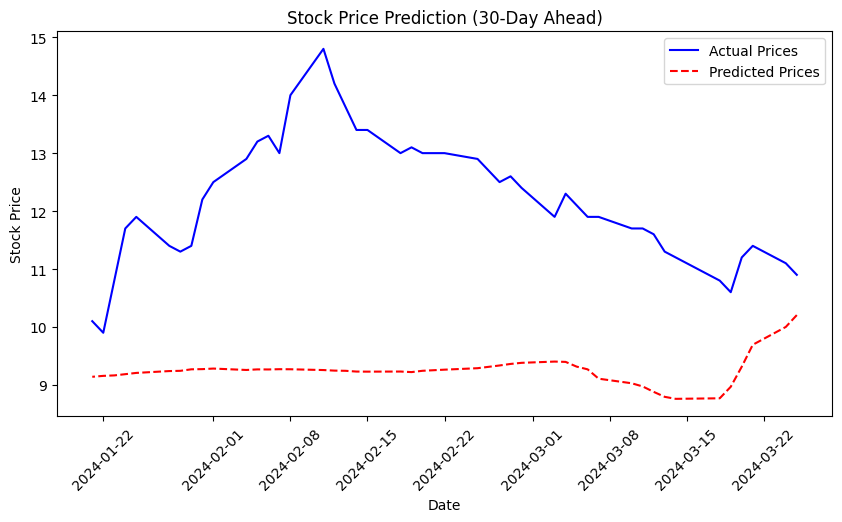

In [5]:

#IFIC
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# xLSTM Cell (No change)
class xLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, forget_bias=1.0, use_layer_norm=True):
        super(xLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.use_layer_norm = use_layer_norm
        
        self.W_xi = nn.Linear(input_size, hidden_size)
        self.W_hi = nn.Linear(hidden_size, hidden_size)
        self.W_xf = nn.Linear(input_size, hidden_size)
        self.W_hf = nn.Linear(hidden_size, hidden_size)
        self.W_xo = nn.Linear(input_size, hidden_size)
        self.W_ho = nn.Linear(hidden_size, hidden_size)
        self.W_xc = nn.Linear(input_size, hidden_size)
        self.W_hc = nn.Linear(hidden_size, hidden_size)
        self.W_ex = nn.Linear(input_size, hidden_size)
        self.W_eh = nn.Linear(hidden_size, hidden_size)
        
        if use_layer_norm:
            self.ln_i = nn.LayerNorm(hidden_size)
            self.ln_f = nn.LayerNorm(hidden_size)
            self.ln_o = nn.LayerNorm(hidden_size)
            self.ln_c = nn.LayerNorm(hidden_size)
            self.ln_x = nn.LayerNorm(hidden_size)
    
    def forward(self, x, states):
        h, c = states
        
        i = torch.sigmoid(self.ln_i(self.W_xi(x) + self.W_hi(h)))
        f = torch.sigmoid(self.ln_f(self.W_xf(x) + self.W_hf(h)))
        o = torch.sigmoid(self.ln_o(self.W_xo(x) + self.W_ho(h)))
        c_tilde = torch.tanh(self.ln_c(self.W_xc(x) + self.W_hc(h)))
        x_ext = torch.sigmoid(self.ln_x(self.W_ex(x) + self.W_eh(h)))
        
        c_next = f * c + i * c_tilde + x_ext * torch.tanh(self.W_ex(x) + self.W_eh(h))
        h_next = o * torch.tanh(c_next)
        
        return h_next, c_next

# xLSTM Layer
class xLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, dropout=0.1):
        super(xLSTM, self).__init__()
        self.layers = nn.ModuleList([xLSTMCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        h = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        c = [torch.zeros(batch_size, layer.hidden_size, device=x.device) for layer in self.layers]
        
        outputs = []
        for t in range(seq_len):
            xt = x[:, t, :]
            for i, layer in enumerate(self.layers):
                h[i], c[i] = layer(xt, (h[i], c[i]))
                xt = h[i]
            outputs.append(h[-1])
        
        outputs = torch.stack(outputs, dim=1)
        return outputs, (h[-1], c[-1])

# Model
class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPredictor, self).__init__()
        self.xlstm = xLSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        xlstm_out, _ = self.xlstm(x)
        return self.fc(xlstm_out[:, -1, :])

# Data Preparation
def prepare_data(csv_file, feature_columns, target_column, seq_length, target_diff, train_split=0.8):
    data = pd.read_csv(csv_file).dropna()

    # Convert 'Date' to datetime format
    data['DATE'] = pd.to_datetime(data['DATE'])

    # Remove commas and convert to float
    for column in feature_columns + [target_column]:
        data[column] = data[column].replace({',': ''}, regex=True).astype(float)

    features = data[feature_columns].values
    target = data[target_column].values

    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
    target_scaler = MinMaxScaler()
    target = target_scaler.fit_transform(target.reshape(-1, 1)).flatten()

    X, y, dates = [], [], []
    for i in range(seq_length, len(features) - target_diff):
        X.append(features[i-seq_length:i])
        y.append(target[i + target_diff])  # Predicting 'target_diff' days ahead
        dates.append(data['DATE'].iloc[i + target_diff])  # Store corresponding date

    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    train_size = int(len(X) * train_split)

    return X[:train_size], y[:train_size], X[train_size:], y[train_size:], scaler, target_scaler, dates[train_size:]

# Training Function
def train_model(model, X_train, y_train, epochs, batch_size, lr):
    dataset = torch.utils.data.TensorDataset(X_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
           
        if epoch % 10 == 0:
             print(f"Epoch {epoch}, Loss: {total_loss / len(dataloader):.6f}")

# Prediction & Evaluation
def evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, forecast_horizon):
    model.eval()
    predictions = model(X_test).detach().numpy()

    # Inverse transform predictions and actual values
    predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test = target_scaler.inverse_transform(y_test.numpy().reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)

    print(f"\n{forecast_horizon}-Day Ahead Prediction")
    print(f"MSE: {mse:.6f}, RMSE: {rmse:.6f}, MAE: {mae:.6f}")

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(dates, y_test, label="Actual Prices", color="blue")
    plt.plot(dates, predictions, label="Predicted Prices", color="red", linestyle="dashed")
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.title(f"Stock Price Prediction ({forecast_horizon}-Day Ahead)")
    plt.show()

# Main Execution
if __name__ == "__main__":
    csv_file = "D:/Research/Top10BDStocksData/IFIC.csv"
    feature_columns = ['OPENP*', 'HIGH', 'LOW', 'CLOSEP*', 'VOLUME']
    target_column = 'CLOSEP*'
    seq_length = 20
    forecast_horizons = [1, 3, 5, 10, 15,20,30]

    for horizon in forecast_horizons:
        print(f"\n### Training for {horizon}-day ahead prediction ###")
        X_train, y_train, X_test, y_test, scaler, target_scaler, dates = prepare_data(csv_file, feature_columns, target_column, seq_length, horizon)
        
        model = StockPredictor(input_size=len(feature_columns), hidden_size=64, num_layers=2, output_size=1)
        train_model(model, X_train, y_train, epochs=100, batch_size=32, lr=0.001)
        evaluate_model(model, X_test, y_test, scaler, target_scaler, dates, horizon)
